In [1]:
from keras.utils import to_categorical
!pip install keras==2.12.0
!pip install keras_preprocessing
from tensorflow.keras.preprocessing.image import load_img
#from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
import os
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test' #test directory

In [3]:
#create function

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame() #dataframe for train
train['image'], train['label'] = createdataframe(TRAIN_DIR) #two column image and label

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame() #dataframe for test
test['image'], test['label'] = createdataframe(TEST_DIR)  #two column image and label

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)


                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
6478  images/test\surprise\9806.jpg  surprise
6479  images/test\surprise\9830.jpg  surprise
6480  images/test\surprise\9853.jpg  surprise
6481  images/test\surprise\9878.jpg  surprise
6482   images/test\surprise\993.jpg  surprise

[6483 rows x 2 columns]


In [8]:
print(test['image'])

0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
6478    images/test\surprise\9806.jpg
6479    images/test\surprise\9830.jpg
6480    images/test\surprise\9853.jpg
6481    images/test\surprise\9878.jpg
6482     images/test\surprise\993.jpg
Name: image, Length: 6483, dtype: object


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = [] #list
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/6483 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0 #255=pixel highest value# model used as supervise model (input with label )
x_test = test_features/255.0

In [14]:
#model encode
from sklearn.preprocessing import LabelEncoder 

In [15]:
le = LabelEncoder()
le.fit(train['label']) #labelencoder created

LabelEncoder()

In [16]:
y_train = le.transform(train['label']) #for label
y_test = le.transform(test['label'])   #for label

In [17]:
y_train = to_categorical(y_train,num_classes = 7) # numclass=no of labels in my folder
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
import cv2
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense #layers 
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu')),
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu')),
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu')),
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))
model.summary() 
  
cv2.ocl.setUseOpenCL(False) 
  
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,  
                               decay_rate=0.96) 
  
optimizer = Adam(learning_rate=lr_schedule) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #model compile

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 1, validation_data = (x_test,y_test), ) 

226/226 [==============================] - 375s 2s/step - loss: 1.8211 - accuracy: 0.2437 - val_loss: 1.7877 - val_accuracy: 0.2806


In [22]:
from keras.models import model_from_json

In [23]:
model_json = model.to_json() #model save
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [24]:
from keras.models import model_from_json #import model form vs notebook

In [25]:

json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model.load_weights("facialemotionmodel.h5")

In [26]:
model_json = model.to_json()  #notinnotebook
with open("facialemotionmodel.json",'w') as json_file:
    json_file.write(model_json)
    model.save("facialemotionmodel.h5")


In [27]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise'] #list albhabetwise

In [28]:
#single image extract feature
def ef(image):
    img = load_img(image,color_mode="grayscale" )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [29]:
#predict model
image = 'images/train/happy/1432.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 [==============================] - 0s 194ms/step
model prediction is  happy


In [30]:
import matplotlib.pyplot as plt #see  predict image
%matplotlib inline   

original image is of happy
1/1 [==============================] - 0s 31ms/step
model prediction is  happy


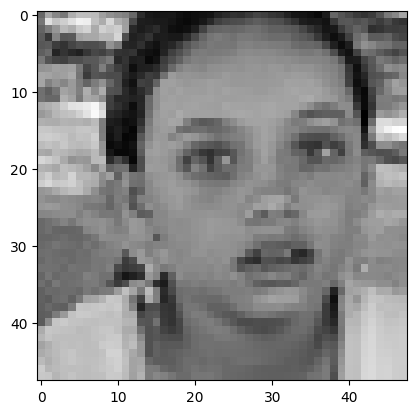

In [31]:
image = 'images/train/happy/1432.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of fear
1/1 [==============================] - 0s 30ms/step
model prediction is  happy


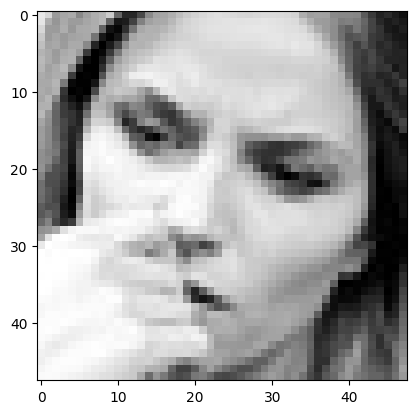

In [32]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 29ms/step
model prediction is  happy


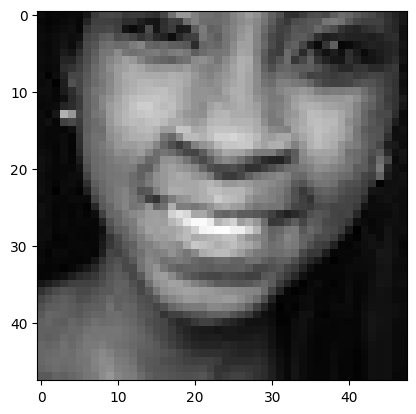

In [33]:
image = 'images/train/happy/35885.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 43ms/step
model prediction is  happy


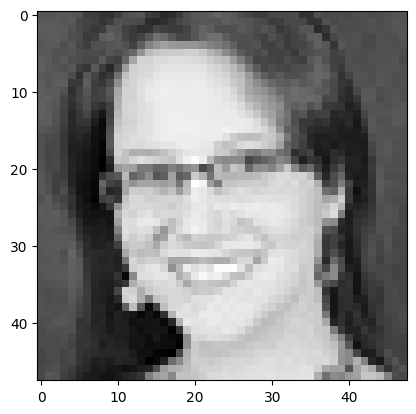

In [34]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 38ms/step
model prediction is  happy


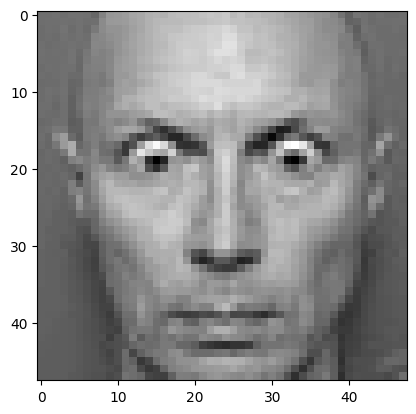

In [35]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')